# Linear Regression Using Batch Gradient Descent

## Mike Bourne - March 2020


In this app, I have coded up Linear Regression using batch gradient descent. I have compared the output to that provided by SKLearn and get similar results, confirming my code. 


Import packages to be used

In [23]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)

Input data and plot

input data, top 5 lines

[[-0.50263969  0.24868016  0.4991201 ]
 [ 3.51730181  2.7586509   2.50576727]
 [ 3.61549207  3.30774604  3.20516402]
 [ 3.98657067  3.99328533  3.99552356]
 [ 5.42370454  5.21185227  5.14123485]]

Data Plotted


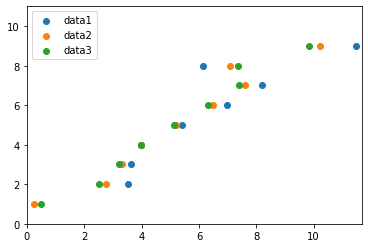

In [24]:
# Creating some input data
random1 = np.random.randn(9)
Y = np.array([1.,2.,3.,4.,5.,6.,7.,8.,9.])
X = np.zeros([3,9])
random1 = np.random.randn(9)
for i in range(1,4):  
    X[i-1] = np.array([1.,2.,3.,4.,5.,6.,7.,8.,9.])+random1/i
    plt.scatter(X[i-1],Y,label='data'+str(i))

XT = X.T
print('input data, top 5 lines\n')
print(XT[0:5])

#and plot the data
print('\nData Plotted')
plt.xlim(0, max(X[0])+0.2)
plt.ylim(0, max(Y)+2)
plt.legend()
plt.show()

Build the model and iterate for the Gradent Descent, calculating the derivatives each time

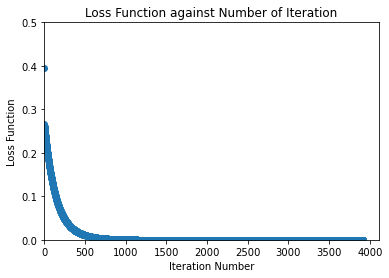

thetas: [ 4.79069166e-04 -6.53661548e-01  6.15295307e-01  1.03828093e+00]


In [52]:
# Create input variables 
par =X.shape[0]+1
points = X.shape[1]
thetas = np.zeros(par)
grad = np.zeros(par)
Y_pred=np.zeros(points)
# plus lists to store outputs calculate with the gradient descent method
error_list = []
thetas_list = []
# and starting variables
error = 10000
old_error = error+1

# The learning Rate & the number of iterations to perform the graident descent method
alpha = 0.01
stop_error= 1e-10

# Performing Gradient Descent whilst differential error between iterations is greater than the stop_error
while((old_error-error)>stop_error):
    
    #Calculate predicted values, Y_pred
    Y_pred = (thetas[1:].dot(X)) + thetas[0]
        
    #calculate gradient decent for all coefficents
    residuals = [ (a-b) for a,b in zip(Y_pred, Y)]
    grad[0] = np.mean(residuals)
    grad[1:] = np.array(residuals).dot(XT)/len(Y)

    # apply iterations of grad back into theta, aplha being the damping parameter
    thetas = thetas - alpha * grad 
    thetas_list.append(thetas)
    
    #calculate loss function (least squared errors)
    old_error = error
    error = np.mean((Y_pred - Y)**2)/2
    error_list.append(error)  

#plot the error-list to demonstrate convergence at a minimum
plt.scatter(range(len(error_list)),error_list)
plt.ylim(0, 0.5)
plt.xlim(0)
plt.xlabel('Iteration Number')
plt.ylabel('Loss Function')
plt.title('Loss Function against Number of Iteration')
plt.show()
print('thetas:',thetas)

Plot iterations of the results for visual inspection of the output

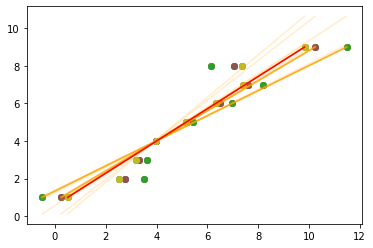

of form y=mx+c where bias (c)= 0.00048  and coeffs (m's)= [-0.65366155  0.61529531  1.03828093]


In [55]:
# Making predictions
Y_pred = np.zeros(points)
for x in range(par-1):
    for t in range(par-1):
        plt.scatter(X[x], Y)
# plot the predictions at every 10 iterations (in orange)
    #Calculate preidcted values, Y_Pred
    for i in range(0,len(thetas_list),int(len(thetas_list)/10)):
        for y in range(points):
            Y_pred[y] = thetas_list[i][0]
            for t in range(1,par):
                Y_pred[y] += thetas_list[i][t]*X[t-1,y] 
            
        plt.plot([min(X[x]), max(X[x])], [min(Y_pred), max(Y_pred)], color='orange',alpha=0.2) 
plt.plot([min(X[x]), max(X[x])], [min(Y_pred), max(Y_pred)], color='red',alpha=1) 
plt.show()
print('of form y=mx+c where bias (c)=',round(thetas[0],5)," and coeffs (m's)=",thetas[1:])

Compare the output with the sklearn algorium for Linear Regression

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(XT, Y)
print('Intercept (theta 0): ', round(regr.intercept_,5))
print('Coefficients:        ', regr.coef_)

Intercept (theta 0):  -0.0
Coefficients:         [-0.65384615  0.61538462  1.03846154]


Similar results are seen between my coded algorium and sklearn 